## import the necessaryLiberaries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
import logging

## Imprting Data

In [2]:
dataset = pd.read_excel("/content/WAR data set.xlsx")

In [3]:
dataset

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,35,9.5,0.147273,3,33.944,20.0,15.0
1,25,8.2,0.050909,3,25.458,20.0,8.0
2,30,9.5,0.550000,3,33.944,20.0,22.0
3,30,9.5,0.550000,7,33.944,20.0,27.3
4,30,9.5,0.550000,10,33.944,20.0,28.6
...,...,...,...,...,...,...,...
116,25,8.0,1.100000,1,38.000,55.0,60.1
117,25,8.0,1.500000,1,38.000,55.0,58.2
118,25,8.0,0.500000,1,38.000,60.0,46.2
119,25,8.0,1.000000,1,38.000,60.0,48.3


In [4]:
dataset.shape

(121, 7)

In [5]:
X = dataset.drop('Water Absorption reduction (%)', axis = 1)
y = dataset['Water Absorption reduction (%)']

# Spliting the data for training and testing

In [6]:
# Train _Test Split
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")
print(f"Validation set size: {X_val.shape}")

Training set size: (96, 6)
Testing set size: (13, 6)
Validation set size: (12, 6)


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)
X_train

array([[-0.51209156, -1.0781941 , -0.05204704, -0.91387126,  2.31366223,
        -0.76841617],
       [-1.1948803 , -1.0781941 , -0.05204704, -0.21388476, -0.13632955,
        -0.03338277],
       [ 0.85348593, -0.16139487, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [ 0.85348593,  0.75540437, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [-0.51209156, -1.0781941 , -1.40661702, -0.91387126,  0.25104603,
        -0.03338277],
       [ 0.17069719,  0.75540437,  1.64116543,  0.48610173, -0.51315507,
        -0.76841617],
       [ 2.21906341,  1.67220361, -0.05204704,  0.48610173, -0.32288486,
        -0.03338277],
       [-0.51209156, -0.61979448, -0.39068954, -0.91387126,  0.21839478,
        -0.76841617],
       [ 0.58037043, -1.0781941 , -1.40661702,  3.75270539, -2.71236056,
        -0.76841617],
       [ 0.17069719,  1.21380399,  0.1172742 ,  0.48610173, -0.48980561,
        -0.76841617],
       [-1.87766904,  0.75540437, -0.05204704,  0.

#Normalization of the data

In [9]:
X_normal = (X - X.min()) / (X.max() - X.min())

In [10]:
X_normal

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L)
0,0.500,0.70,0.079777,0.10,0.442209,0.126984
1,0.250,0.44,0.014224,0.10,0.147403,0.126984
2,0.375,0.70,0.353741,0.10,0.442209,0.126984
3,0.375,0.70,0.353741,0.30,0.442209,0.126984
4,0.375,0.70,0.353741,0.45,0.442209,0.126984
...,...,...,...,...,...,...
116,0.250,0.40,0.727891,0.00,0.583116,0.682540
117,0.250,0.40,1.000000,0.00,0.583116,0.682540
118,0.250,0.40,0.319728,0.00,0.583116,0.761905
119,0.250,0.40,0.659864,0.00,0.583116,0.761905


## Linear Regression model

In [11]:
from sklearn.linear_model import LinearRegression
LReg = LinearRegression()

In [12]:
LReg.fit(X_train ,y_train)

LinearRegression()

In [13]:
LReg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
y_pred_train = LReg.predict(X_train)
y_pred_test = LReg.predict(X_test)
y_pred_val= LReg.predict(X_val)

#Evaluation of the model

In [15]:
from math import sqrt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Evaluate on the training set
print("Training Set Metrics:")
print(f'The RMSE on the training dataset is: {sqrt(mean_squared_error(y_train, LReg.predict(X_train))):.4f}')
print(f'The MSE on the training dataset is: {(mean_squared_error(y_train, LReg.predict(X_train))):.4f}')
print(f'The MAE on the training daset is: {mean_absolute_error(y_train, LReg.predict(X_train)):.4f}')
print(f'The r2_score on the training dataset is: {r2_score(y_train, LReg.predict(X_train)):.4f}')
print("-" * 30)

# Evaluate on the testing set
print("Testing Set Metrics:")
print(f'The RMSE on the testing dataset is: {sqrt(mean_squared_error(y_test, LReg.predict(X_test))):.4f}')
print(f'The MSE on the testing dataset is: {(mean_squared_error(y_test, LReg.predict(X_test))):.4f}')
print(f'The MAE on the testing dataset is: {mean_absolute_error(y_test, LReg.predict(X_test)):.4f}')
print(f'The r2_score on the testing dataset is: {r2_score(y_test, LReg.predict(X_test)):.4f}')
print("-" * 30)

# Evaluate on the validation set
print("Validation Set Metrics:")
print(f'The RMSE on the validation dataset is: {sqrt(mean_squared_error(y_val, LReg.predict(X_val))):.4f}')
print(f'The MSE on the validation dataset is: {(mean_squared_error(y_val, LReg.predict(X_val))):.4f}')
print(f'The MAE on the validation dataset is: {mean_absolute_error(y_val, LReg.predict(X_val)):.4f}')
print(f'The r2_score on the validation dataset is: {r2_score(y_val, LReg.predict(X_val)):.4f}')

Training Set Metrics:
The RMSE on the training dataset is: 10.8370
The MSE on the training dataset is: 117.4395
The MAE on the training daset is: 8.8267
The r2_score on the training dataset is: 0.4950
------------------------------
Testing Set Metrics:
The RMSE on the testing dataset is: 11.7064
The MSE on the testing dataset is: 137.0394
The MAE on the testing dataset is: 9.2662
The r2_score on the testing dataset is: 0.1516
------------------------------
Validation Set Metrics:
The RMSE on the validation dataset is: 272.2537
The MSE on the validation dataset is: 74122.0581
The MAE on the validation dataset is: 234.8161
The r2_score on the validation dataset is: -240.7791


## Actual vs Predicted Capacity for test data

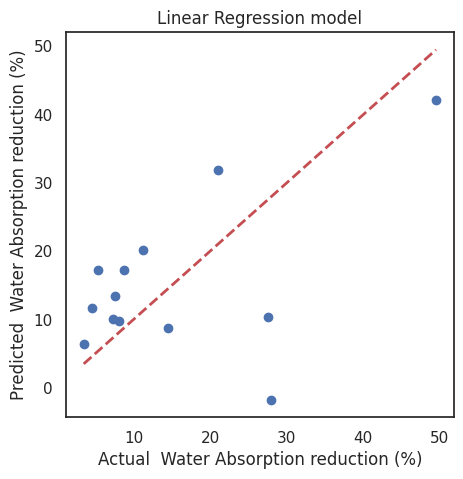

In [16]:
sns.set_style("white")
plt.figure(figsize=(5,5))
plt.title('Linear Regression model')
plt.ylabel("Predicted  Water Absorption reduction (%)")
plt.xlabel("Actual  Water Absorption reduction (%)")
plt.scatter(y_test,y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

## Actual vs Predicted Capacity for train data

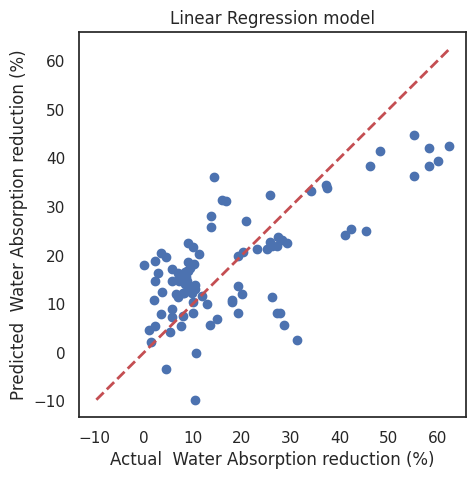

In [17]:
plt.figure(figsize=(5,5))
plt.scatter(y_train,y_pred_train )
plt.title('Linear Regression model')
plt.ylabel("Predicted  Water Absorption reduction (%)")
plt.xlabel("Actual  Water Absorption reduction (%)")
min_val = min(y_train.min(), y_pred_train.min())
max_val = max(y_train.max(), y_pred_train.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

#check the model in the single row

In [18]:
X1 = np.array(X)

In [19]:
X1[0].reshape(1,6)

array([[35.        ,  9.5       ,  0.14727273,  3.        , 33.944     ,
        20.        ]])

In [20]:
LReg.predict(scaler.transform(X1[0].reshape(1,6)))

array([7.04377053])

#### The above result indicates what the model is predict but the resul of water absorption reduction form the exiperment is 15%

#Getting Coefficients and Intercept

In [21]:

coefficients = LReg.coef_
intercept = LReg.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [-2.43415197 -0.94079342  1.90077876 -3.40992809  2.2032078   7.2210267 ]
Intercept: 17.735535368217054


In [42]:
new_data = pd.DataFrame({
    'Temprature(℃)': [25, 25, 25, 25, 25, 25, 25, 25, 25],
    'PH': [7, 7, 7, 7, 7, 7, 7, 7, 7],
    'CaCl₂ (mol/L)': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'Soaking Time (days)': [1, 1, 1, 1, 1, 1, 1, 1, 1],
    'Converted Enzyme Conc (g/L)': [50, 50, 50, 50, 50, 50, 50, 50, 50],
    'Urea Conc (g/L)': [40,40, 40, 40, 40, 40, 40, 40, 40],
    'Water Absorption reduction (%)': [12.4,16.8, 21, 25.8, 34.2, 37.4, 37.3, 37.36, 36.5]
})

display(new_data)

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%)
0,25,7,0.1,1,50,40,12.40
1,25,7,0.2,1,50,40,16.80
2,25,7,0.3,1,50,40,21.00
3,25,7,0.4,1,50,40,25.80
4,25,7,0.5,1,50,40,34.20
5,25,7,0.6,1,50,40,37.40
6,25,7,0.7,1,50,40,37.30
7,25,7,0.8,1,50,40,37.36
8,25,7,0.9,1,50,40,36.50


In [39]:
new_predictions = LReg.predict(new_data.drop('Water Absorption reduction (%)', axis=1))

In [43]:
new_data['Predicted Water Absorption reduction (%)'] = new_predictions
display(new_data)

,Temprature(℃),PH,CaCl₂ (mol/L),Soaking Time (days),Converted Enzyme Conc (g/L),Urea Conc (g/L),Water Absorption reduction (%),Predicted Water Absorption reduction (%)
0,25,7,0.1,1,50,40,12.40,346.077790
1,25,7,0.2,1,50,40,16.80,346.267868
2,25,7,0.3,1,50,40,21.00,346.457946
3,25,7,0.4,1,50,40,25.80,346.648023
4,25,7,0.5,1,50,40,34.20,346.838101
5,25,7,0.6,1,50,40,37.40,347.028179
6,25,7,0.7,1,50,40,37.30,347.218257
7,25,7,0.8,1,50,40,37.36,347.408335
8,25,7,0.9,1,50,40,36.50,347.598413


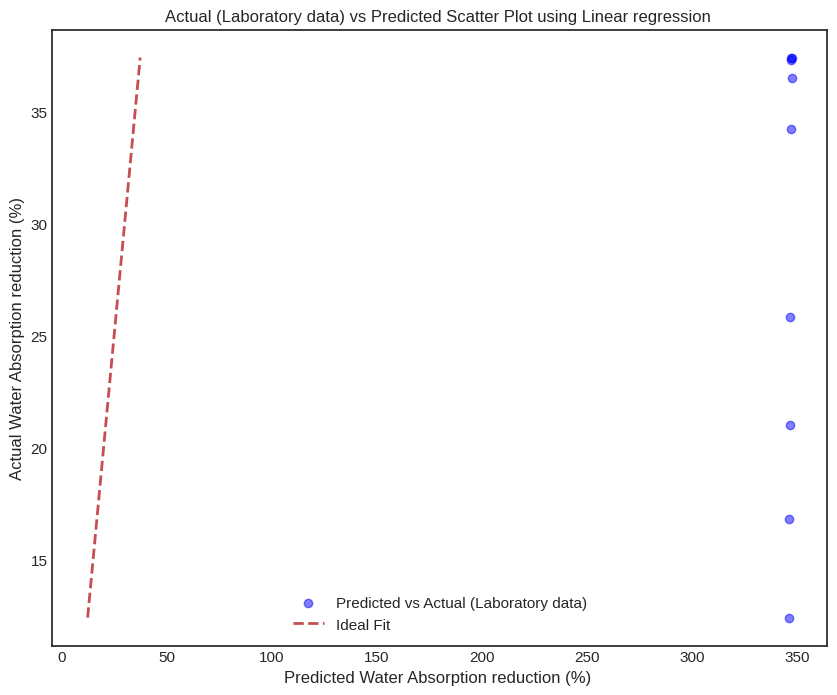

In [44]:
plt.figure(figsize=(10, 8))
plt.style.use('seaborn-v0_8-white')
plt.scatter(new_data['Predicted Water Absorption reduction (%)'], new_data['Water Absorption reduction (%)'], color="blue", alpha=0.5, label="Predicted vs Actual (Laboratory data)")
plt.plot([new_data['Water Absorption reduction (%)'].min(), new_data['Water Absorption reduction (%)'].max()],
         [new_data['Water Absorption reduction (%)'].min(), new_data['Water Absorption reduction (%)'].max()],
         'r--', lw=2, label="Ideal Fit")
plt.xlabel("Predicted Water Absorption reduction (%) ")
plt.ylabel("Actual Water Absorption reduction (%)")
plt.title("Actual (Laboratory data) vs Predicted Scatter Plot using Linear regression ")
plt.legend()
plt.show()